In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Lectura del dataset
datos = pd.read_csv("car details v4.csv")

           Marca                           Modelo     Precio    Anio  \
0          Honda              Amaze 1.2 VX i-VTEC   505000.0  2017.0   
1  Maruti Suzuki                  Swift DZire VDI   450000.0  2014.0   
2        Hyundai             i10 Magna 1.2 Kappa2   220000.0  2011.0   
3         Toyota                         Glanza G   799000.0  2019.0   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000.0  2018.0   

   Kilometraje TipoCombustible Transmision  Ubicacion   Color   Dueno  \
0      87150.0          Petrol      Manual       Pune    Grey   First   
1      75000.0          Diesel      Manual   Ludhiana   White  Second   
2      67000.0          Petrol      Manual    Lucknow  Maroon   First   
3      37500.0          Petrol      Manual  Mangalore     Red   First   
4      69000.0          Diesel      Manual     Mumbai    Grey   First   

  TipoVendedor    Motor      MaximaPotencia            MaximoTorque Terreno  \
0    Corporate  1198 cc   87 bhp @ 6000 rpm      

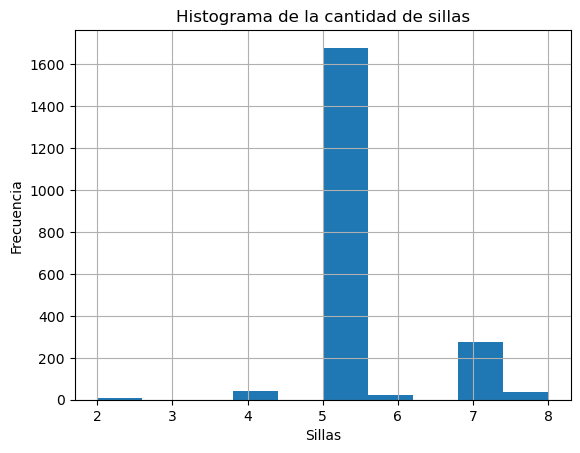

In [6]:
# 1. Análisis exploratorio de los datos
print(datos.head())

print(datos.describe())

datos["Sillas"].hist()
plt.title("Histograma de la cantidad de sillas")
plt.xlabel("Sillas")
plt.ylabel("Frecuencia")
plt.show()

           Marca                           Modelo     Precio    Anio  \
0          Honda              Amaze 1.2 VX i-VTEC   505000.0  2017.0   
1  Maruti Suzuki                  Swift DZire VDI   450000.0  2014.0   
2        Hyundai             i10 Magna 1.2 Kappa2   220000.0  2011.0   
3         Toyota                         Glanza G   799000.0  2019.0   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000.0  2018.0   

   Kilometraje TipoCombustible Transmision  Ubicacion   Color   Dueno  \
0      87150.0          Petrol      Manual       Pune    Grey   First   
1      75000.0          Diesel      Manual   Ludhiana   White  Second   
2      67000.0          Petrol      Manual    Lucknow  Maroon   First   
3      37500.0          Petrol      Manual  Mangalore     Red   First   
4      69000.0          Diesel      Manual     Mumbai    Grey   First   

  TipoVendedor    Motor      MaximaPotencia            MaximoTorque Terreno  \
0    Corporate  1198 cc   87 bhp @ 6000 rpm      

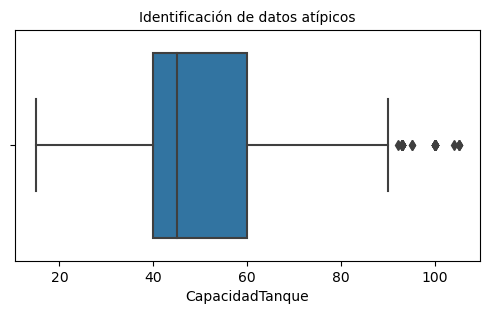

In [7]:
# 2. Preprocesamiento de los datos
# Imputar los valores faltantes. Numéricos -> Moda | Cadenas -> Más frecuente
imputadorNumerico = SimpleImputer(strategy="most_frequent")

columnasNumericas = datos.select_dtypes(include=["float64", "int64"]).columns
datos[columnasNumericas] = imputadorNumerico.fit_transform(datos[columnasNumericas])

imputadorCategorico = SimpleImputer(strategy="most_frequent")

columnasCategoricas = datos.select_dtypes(include=["object"]).columns
datos[columnasCategoricas] = imputadorCategorico.fit_transform(
    datos[columnasCategoricas]
)

# Eliminar registros duplicados
datos.drop_duplicates()

print(datos.head())

plt.figure(figsize=(6, 3))
sns.boxplot(x=datos["CapacidadTanque"])
plt.title("Identificación de datos atípicos", fontsize=10)
plt.show()

In [8]:
# 4. División del dataset en Train y Test
# Se crean las variables 'x' y 'y' para separar y almacenar la información del entrenamiento
X = datos.drop("Precio", axis=1)
Y = datos["Precio"]

# Se utiliza la relación 75/25. 75% para el train y 25% para el test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)
print(X_train)
print(y_train)

              Marca                           Modelo    Anio  Kilometraje  \
4            Toyota  Innova 2.4 VX 7 STR [2016-2020]  2018.0      69000.0   
204   Mercedes-Benz      E-Class E350 CDI Avantgarde  2012.0      72000.0   
408         Renault              Kiger RXT Turbo CVT  2021.0      13000.0   
434         Renault                Duster RXL Petrol  2017.0      60444.0   
1363  Maruti Suzuki                        Swift LXi  2011.0      28513.0   
...             ...                              ...     ...          ...   
1033     Volkswagen            Vento Highline Petrol  2011.0      80000.0   
1731  Mercedes-Benz                V-Class Elite LWB  2020.0      40000.0   
763   Maruti Suzuki                   Swift ZDi Plus  2019.0      80849.0   
835            MINI                         Cooper S  2020.0      13000.0   
1653           Tata                  Nexon XM Diesel  2018.0      65000.0   

     TipoCombustible Transmision  Ubicacion   Color   Dueno TipoVendedor  \

In [9]:
# 5. Entrenamiento del modelo por medio de los hiperparametros
# Alimentamos el modelo de entrenamiento
modeloRegresion = LinearRegression()
modeloRegresion.fit(X_train, y_train)

ValueError: could not convert string to float: 'Toyota'